Below is an example of the sift algorithm, coded in the module sfm_algo_unpacked, and the point cloud generation, coded in module point_cloud.py.

Running the cell will create 3 popups. The first is the lines from each point found to be matching. The second is the points used to create the point cloud, the third is a graphical representation of the point cloud rendered in the 3d.

The code is timed in two steps. The first is the SIFT algorithm responsible for identifying point, and the second is the matching of points, camera pose recreation, and triangulation of the points to create the point cloud. The total time can also be seen underneath the cell in the jupiter notebook.

In order the run this code, the following packages must be installed:

OpenCV
Numpy

which can be installed using pip:
pip install opencv-python
pip install numpy

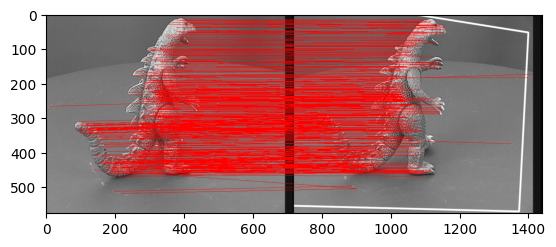

Computed essential matrix: [[ 0.12281114 -1.          0.08214333]
 [ 1.00976105  0.14432927  0.04838747]
 [-0.09397728 -0.05678987 -0.00125405]]


c:\Users\Benisawsum\Desktop\College\HWSW Codesign\gaussian-splat\point_cloud.py:155: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


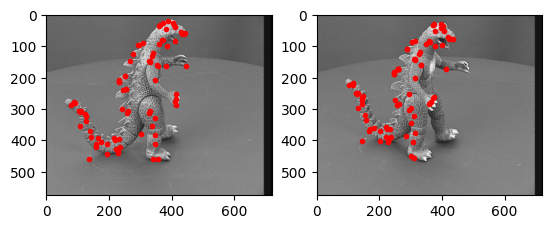

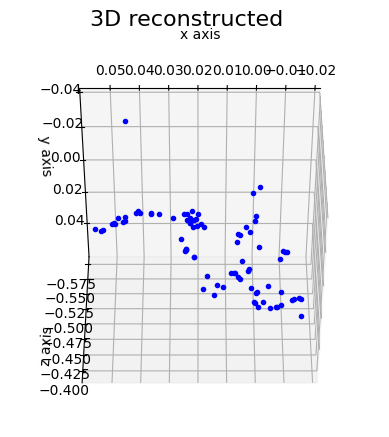

Sift time: 
132.55175876617432
Computed essential matrix: [[ 0.12281114 -1.          0.08214333]
 [ 1.00976105  0.14432927  0.04838747]
 [-0.09397728 -0.05678987 -0.00125405]]
Point Cloud time: 
0.004004240036010742


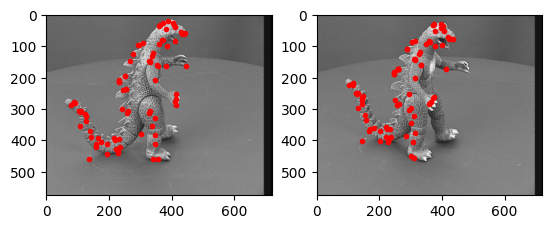

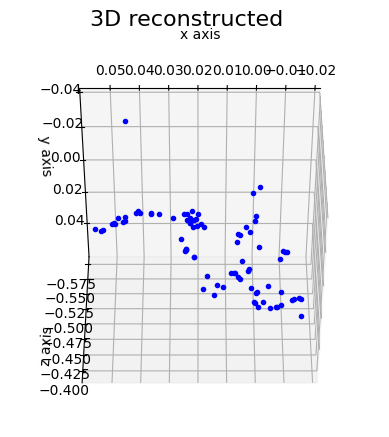

In [1]:
from point_cloud import dino, compute_essential_normalized, compute_P_from_essential, reconstruct_one_point, linear_triangulation
import numpy as np
import matplotlib.pyplot as plt
import time


start1 = time.time()

points1, points2, intrinsic = dino()

end1 = time.time()
print("Sift time: ")
print(end1 - start1)

start2 = time.time()

points1n = np.dot(np.linalg.inv(intrinsic), points1)
points2n = np.dot(np.linalg.inv(intrinsic), points2)
E = compute_essential_normalized(points1n, points2n)
print('Computed essential matrix:', (-E / E[0][1]))


P1 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])
P2s = compute_P_from_essential(E)

ind = -1
for i, P2 in enumerate(P2s):
    # Find the correct camera parameters
    d1 = reconstruct_one_point(
        points1n[:, 0], points2n[:, 0], P1, P2)

    # Convert P2 from camera view to world view
    P2_homogenous = np.linalg.inv(np.vstack([P2, [0, 0, 0, 1]]))
    d2 = np.dot(P2_homogenous[:3, :4], d1)

    if d1[2] > 0 and d2[2] > 0:
        ind = i

P2 = np.linalg.inv(np.vstack([P2s[ind], [0, 0, 0, 1]]))[:3, :4]
tripoints3d = linear_triangulation(points1n, points2n, P1, P2)
end2 = time.time()
print("Point Cloud time: ")
print(end2 - start2)

fig = plt.figure()
fig.suptitle('3D reconstructed', fontsize=16)
ax = fig.add_subplot(111, projection='3d')
ax.plot(tripoints3d[0], tripoints3d[1], tripoints3d[2], 'b.')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.view_init(elev=135, azim=90)
plt.show()